## Final Project Submission

Please fill out:
* Student name: NANCY CHELANGAT
* Student pace: full time
* Scheduled project review date/time: N/A
* Instructor name: Nikita
* Blog post URL: N/A


# Film Studio Recommendation for Microsoft

**Author:** Nancy Chelangat
***

## Background and Overview
***

Newly created Microsoft Film Studios is looking for recommendations on what their first film should be. Analysis of film metadata from IMDB and financial data from The Numbers will be used to make recommendations to the studio.

## Problem Statement
***

Microsoft, one of the prominent tech giants globally, is the latest entrant into the realm of original video content production. While the company boasts extensive expertise in creating software widely used by people, their experience in crafting films that resonate with audiences is relatively limited. However, compensating for this knowledge gap is their abundant resources, prompting them to venture into the domain of box office success with the intent of producing a hit movie.

Key considerations include:

1. Determining the most financially successful film genres.
2. Identifying optimal release timing.
3. Establishing an appropriate budget.


## Data Understanding
***

IMDb, known as the Internet Movie Database, stands as one of the foremost platforms for movie-related news and information. Offering a plethora of data ranging from ratings, film titles, genres, to details on crew and cast members, IMDb also provides extensive biographical information. The data files furnished for this project pertain to the year 2019.

On the other hand, The Numbers serves as a prominent source for movie financial insights. Specializing in offering comprehensive data on production costs and gross sales, The Numbers' provided data files are also sourced from the year 2019.

# Set up DataFrames

## Loading datasets

Perform the standard imports of pandas, numpy, seaborn, and matplotlib, and include the magic line to print plots in our Jupyter notebook.

The three main datasets for analysis are:

- title.basics.csv
- title.ratings.csv
- tn.movie_budgets.csv

The first two datasets contain movie names and rating information, which will be merged on the unique identifier 'tconst'. Additionally, unique IDs will be used to retrieve cast and crew names from the additional datasets. Although the tn.movie_budgets dataset lacks this identifier, it provides the financial data and release information necessary for analysis.

The three additional datasets to explore are:

- name.basics.csv
- title.crew.csv
- title.principals.csv

The crew and principals datasets contain lists of individuals involved in films, with each entry containing the 'tconst' unique identifiers to link the movie data. They also share another identifier connecting to the name.basics dataset, providing biographical information such as names, birth/death dates, and roles.

In [73]:
# import the required libraries 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as pyplot
import sqlite3

%matplotlib inline


## DATA UNDERSTANDING 
## 1. TMDB Dataset
TMDB dataset is comprised of records on 26,517 movies and includes 9 columns of datapoints on each movie. The target data includes release date and genre where the genre codes are ordered by relevance.

In [13]:
df_tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col = 0, 
                      parse_dates=['release_date'])
df_tmdb.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### 2. The Numbers (TN)
The Numbers (TN) dataset is comprised of records on 5,782 movies and includes 6 columns of datapoints on each movie. The target data includes production budget and worldwide gross revenue.

In [14]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', 
                    parse_dates=['release_date'])
tn_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### 3. IMDB
#### Importing Data
IMDB dataset is comprised of multiple tables containing various information about movies. The two tables of interest are: `movie_basics` and `movie_ratings`.

The `movie_basics` table includes movie titles, release year, and genres. The `movie_ratings` table includes average movie rating and number of votes. The primary key for both tables is `movie_id`.

Target data include runtime minutes and average rating.

In [27]:
# Reading the first 5 rows of the movie_ratings table
con = sqlite3.connect("im.db")
mr = pd.read_sql("""
SELECT *
FROM movie_ratings;
""", conn)

mr.head(5)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [28]:
# Reading the first 5 rows of the movie_basics table
mb = pd.read_sql("""
SELECT *
FROM movie_basics;
""", conn)

mb.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## CLEANING DATA
#### CORRECTING DATA TYPES 
##### The following column will be dropped. 
popularity`
   - Popularity is based on current website popularity, not how well the movie performed when released or how it was reviewed
    
- `id` Just a unique identifier, not relevant

- `original_title` There are two columns for title, we will keep the final title column

In [30]:
#cleaned data after droping the rows is stored in a variable named df_cleaning
df_cleaning = df_tmdb.drop(['popularity', 'id', 'original_title'], axis=1)

In [32]:
df_filtered = df_cleaning[df_cleaning['original_language'] == 'en']
df_filtered = df_filtered.drop('original_language', axis=1)

In [33]:
df_filtered['vote_count'].describe()

count    23291.000000
mean       209.307887
std       1016.214512
min          1.000000
25%          1.000000
50%          4.000000
75%         24.000000
max      22186.000000
Name: vote_count, dtype: float64

**Drop Certain Movies**

Dropping movies with a vote count below 200 votes.
(We chose this value as it is roughly the average of the number of votes in the dataset)

In [36]:
df_filtered = df_filtered[df_filtered['vote_count'] > 200]

#### LIMITING TO RECENT MOVIES 
Limiting the number of movies to those released in 2010 and after. 


In [37]:
df_filtered = df_filtered[df_filtered['release_date'] >
                          pd.Timestamp(2010, 1, 1)]

### MERGING TABLES 
We need to merge the `movie_ratings` table with the `movie_basics` table to get the full picture of our dataset.

The `movies_with_ratings` variable is created to store the merged dataframe

In [42]:
movies_with_ratings = pd.merge(mr, mb, 
                               left_on='movie_id', right_on='movie_id')
movies_with_ratings.head(3)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama


### Removing Unnecessary Columns & Filtering Data<a class="anchor" id="imdb_filter"></a>
**Columns to drop:**
- `original_title`
    - We are only interested in the final, production title
- `genres`
    - Genres are not relevant to this analysis and are addressed elsewhere

In [43]:
movies_with_ratings_clean = movies_with_ratings.drop(['original_title', 'genres'], axis=1)

**Columns to filter:**
- `numvotes`
    - We only want to rely on the average rating in our analysis if a movie has a sufficient number of votes that went into that average rating.  
    - For this dataset, we are dropping any movies that have a vote count of less than the median (49).
    

In [44]:
# finding median
movies_with_ratings_clean['numvotes'].median()

49.0

In [45]:
# Dropping movies with votes less that the median(49) 
movies_over_median_votes = movies_with_ratings_clean.loc[
    movies_with_ratings_clean['numvotes'] > movies_with_ratings_clean['numvotes'].median()]

## DATA ANALYSIS


In [48]:
df_tmdb_mod = df_filtered
df_tmdb_mod['movie'] = df_tmdb_mod['title']
df_tmdb_mod = df_tmdb_mod.set_index('movie')
df_tmdb_mod = df_tmdb_mod.drop('genre_ids', axis=1)
df_tmdb_mod.head(1)

df_tndb_mod = tn_df.set_index('movie')
df_tndb_mod = df_tndb_mod.drop('release_date', axis=1)
df_tndb_mod.head(1)

,id,production_budget,domestic_gross,worldwide_gross
movie,,,,
Avatar,1,"$425,000,000","$760,507,625","$2,776,345,279"


### Joining The MovieDB with The Numbers Database

In [49]:

df_tmdb_tn_innerjoin = df_tmdb_mod.join(df_tndb_mod, on='movie', how='inner',
                                        lsuffix='tmdb', rsuffix='tn')
df_tmdb_tn_innerjoin.head(3)


,release_date,title,vote_average,vote_count,id,production_budget,domestic_gross,worldwide_gross
movie,,,,,,,,
How to Train Your Dragon,2010-03-26,How to Train Your Dragon,7.7,7610,30,"$165,000,000","$217,581,232","$494,870,992"
Iron Man 2,2010-05-07,Iron Man 2,6.8,12368,15,"$170,000,000","$312,433,331","$621,156,389"
Inception,2010-07-16,Inception,8.3,22186,38,"$160,000,000","$292,576,195","$835,524,642"


### IMDB
#### Runtime minute analysis

In [55]:
main_data_dropna = movies_over_median_votes.dropna(subset=['runtime_minutes'])

In [56]:
main_data_dropna_best_rated = main_data_dropna.loc[(main_data_dropna['averagerating'] >= 8.0) 
                                                   & (main_data_dropna['runtime_minutes'] < 250)]

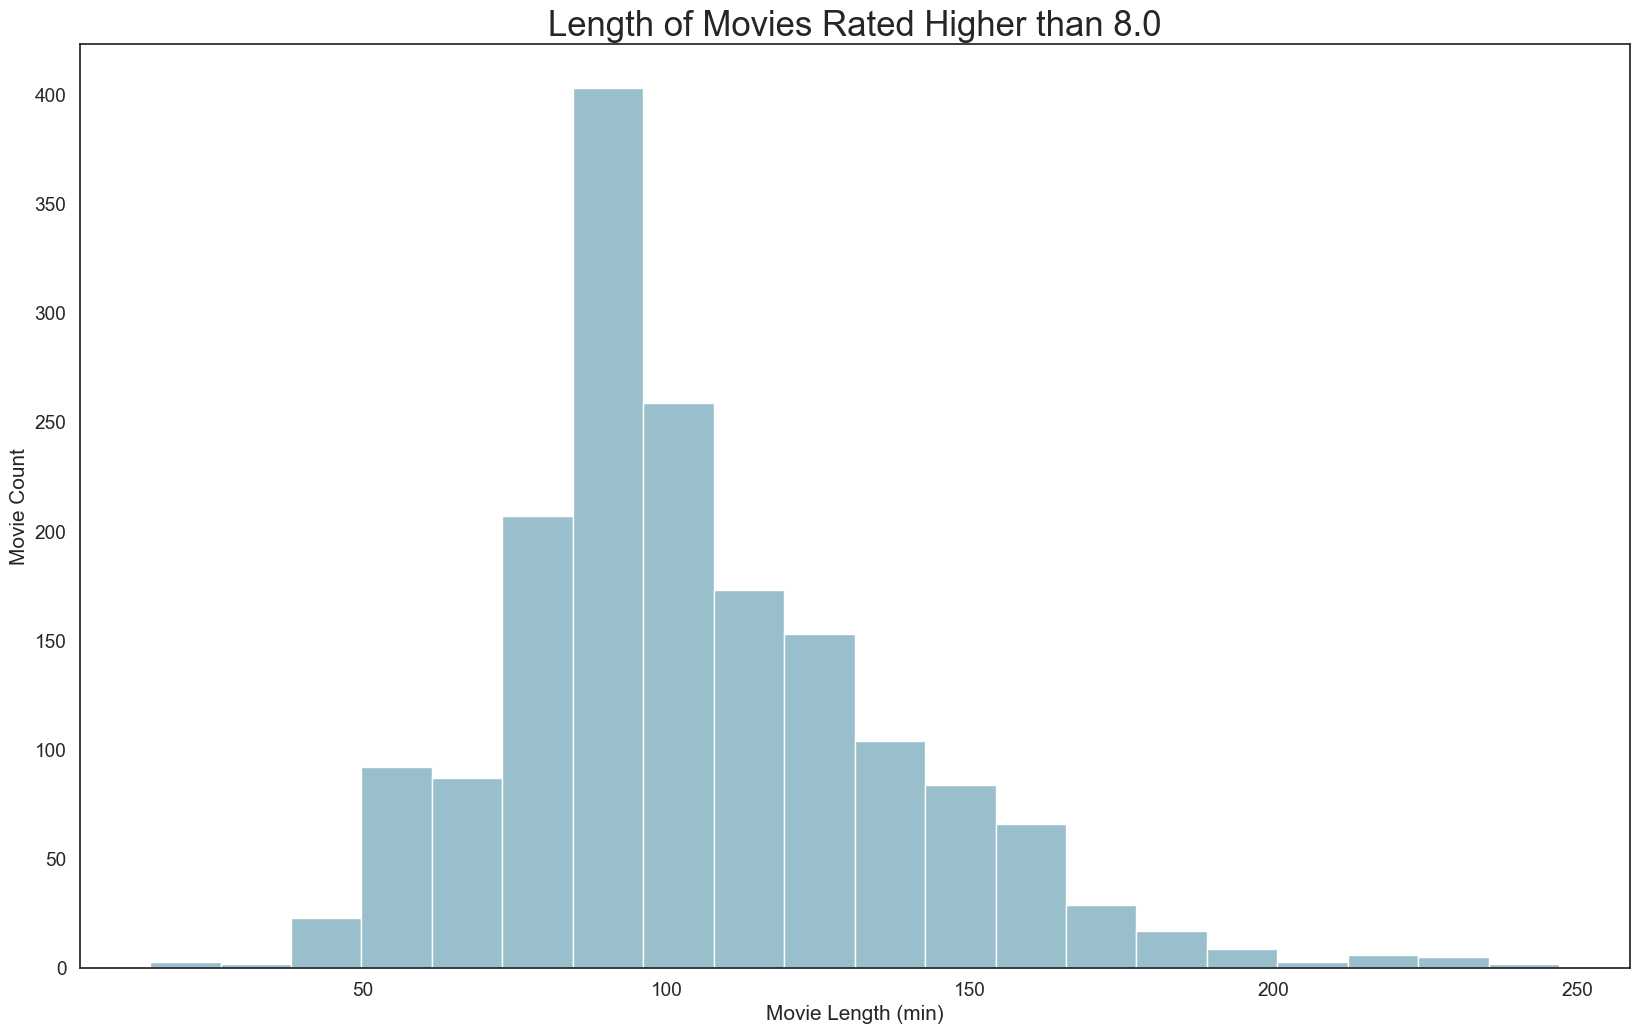

In [57]:
sns.set_theme(context='notebook', palette='blend:#7AB,#7AB', 
              style='white', font='sans-serif', font_scale=1.25, 
              color_codes=True, rc={'figure.figsize':(20,12)})

hist = sns.histplot(main_data_dropna_best_rated['runtime_minutes'], bins=20)

hist.set(xlabel='Movie Length (min)', ylabel='Movie Count');
hist.set_title('Length of Movies Rated Higher than 8.0', fontsize=25);

In [63]:
yjoin = df_tmdb_tn_innerjoin.groupby(['primary_genre']).mean().sort_values( \
    by='profit_mils', ascending=False)[:10]
xjoin = list(df_tmdb_tn_innerjoin.groupby(['primary_genre']).mean().sort_values( \
    by='profit_mils', ascending=False).index)[:10]
fig2, axj = plt.subplots(figsize=(20, 12))

sns.barplot(x=xjoin, y=yjoin['profit_mils'], 
            saturation=.4, palette='blend:#EDA,#7AB')

axj.set_title('Average Net Profit by Genre', fontsize=25)
axj.set_xlabel('Movie Genre Categories')
axj.set_ylabel('Net Profit (MM)')


for loc, label in enumerate(yjoin['profit_mils']):
    axj.text(loc, label+.15, (str(int(round(label, ndigits=0))) + 'MM'), ha='center');

KeyError: 'primary_genre'

In [1]:
conn = sqlite3.connect("im.db")
mb_join_mr = pd.read_sql(
 """
    SELECT mb.movie_id, mb.runtime_minutes, mr.averagerating, mr.numvotes, mb.genres
    FROM movie_basics AS mb
    INNER JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id;
"""
) , conn

# Execute the SQL query and read the result into a pandas DataFrame
merged_table_df = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()

# Print the DataFrame (for demonstration)
print(merged_table_df)

NameError: name 'sqlite3' is not defined


# BUSINESS RECOMMENDATIONS TO MICROSOFT
1. We strongly advise aiming for a movie runtime of approximately 90 minutes. This suggestion is reinforced by our analysis of highly rated movies, as depicted in the histogram showcasing movie lengths. It reveals that there is a notable concentration of movies falling within the 90-100 minute range, suggesting a viewer preference for films of this duration.
2. We advise focusing on producing movies within the 'animated' or 'family' genres to optimize net profit. This recommendation is supported by the fact that movies classified under these genres exhibit the highest average net profits, with 'animated' films averaging $313 million and 'family' films averaging $292 million.
3. We recommend that Microsoft consider investing a minimum of $200 million per film. Our initial data modeling, as indicated by TN, suggests a positive correlation between higher budgets and increased profits. This assertion is bolstered by our analysis of the median Return on Investment (ROI), where films with larger budgets exhibit the potential for achieving the highest returns